## ALUNOS:
Nayra Kaline Santos Vidal, 769847 <br/>
Iago Elias de Faria Barbosa, 759027

# PARTE 1
Avaliação de árvore de decisão com métricas de classificação.
## Importações

In [33]:
import pandas
from sklearn                   import datasets
from sklearn.model_selection   import train_test_split
from sklearn.tree              import DecisionTreeClassifier, plot_tree
from sklearn.metrics           import confusion_matrix, classification_report
from sklearn.preprocessing     import MinMaxScaler
from sklearn.cluster           import KMeans
from math                      import sqrt
import matplotlib.pyplot       as plt
import numpy as np
import re

## Labels
Seleção das labels

In [3]:
labels = ['class', 'Alcohol', 'Malicacid', 'Ash', 
          'Alcalinityofash', 'Magnesium', 'Totalphenols', 
          'Flavanoids', 'Nonflavanoidphenols', 'Proanthocyanins', 'Color intensity',
          'Hue', 'OD280/OD315 of diluted wines', 'Proline']

## Leitura do conjunto de dados
Por ser um conjunto de dados externo, a leitura de dados foi feita a partir da função read.csv() da biblioteca Pandas.

In [4]:
wine_csv = pandas.read_csv('dataset/wine.data', names=labels)
wine_csv.describe()

,class,Alcohol,Malicacid,Ash,Alcalinityofash,Magnesium,Totalphenols,Flavanoids,Nonflavanoidphenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Atributos (x) e Classes(y)
Separação do conjunto de dados entre uma matriz de atributos, que é X, e um vetor de classes, Y.

In [5]:
y = pandas.get_dummies(wine_csv['class']) # classes
x = wine_csv[list(filter(lambda x: x != 'class', labels))]

## Conjunto de teste
Divisão do conjunto de dados em um conjunto de treinamento e um conjunto de teste

In [6]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42
)

## Indução de árvore de decisão
Aplicação do algoritmo de indição de árvore de decisão no conjunto de treinamento.

In [7]:
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(x_train,y_train)

## Árvore de decisão
Função plot_tree para gerar a figura da árvore de decisão.

[Text(148.8, 195.696, 'X[9] <= 3.82\nentropy = 0.911\nsamples = 119\nvalue = [[80, 39]\n[72, 47]\n[86, 33]]'), Text(74.4, 152.208, 'X[0] <= 13.02\nentropy = 0.181\nsamples = 43\nvalue = [[41, 2]\n[2, 41]\n[43, 0]]'), Text(37.2, 108.72, 'entropy = 0.0\nsamples = 37\nvalue = [[37, 0]\n[0, 37]\n[37, 0]]'), Text(111.60000000000001, 108.72, 'X[12] <= 730.0\nentropy = 0.612\nsamples = 6\nvalue = [[4, 2]\n[2, 4]\n[6, 0]]'), Text(74.4, 65.232, 'entropy = 0.0\nsamples = 4\nvalue = [[4, 0]\n[0, 4]\n[4, 0]]'), Text(148.8, 65.232, 'entropy = 0.0\nsamples = 2\nvalue = [[0, 2]\n[2, 0]\n[2, 0]]'), Text(223.20000000000002, 152.208, 'X[6] <= 1.4\nentropy = 0.795\nsamples = 76\nvalue = [[39, 37]\n[70, 6]\n[43, 33]]'), Text(186.0, 108.72, 'entropy = 0.0\nsamples = 33\nvalue = [[33, 0]\n[33, 0]\n[0, 33]]'), Text(260.40000000000003, 108.72, 'X[12] <= 724.5\nentropy = 0.389\nsamples = 43\nvalue = [[6, 37]\n[37, 6]\n[43, 0]]'), Text(223.20000000000002, 65.232, 'X[1] <= 3.92\nentropy = 0.394\nsamples = 7\nval

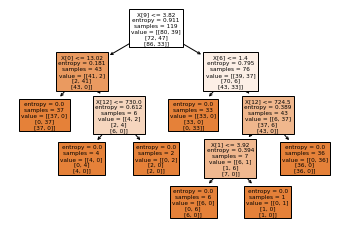

In [40]:
print(plot_tree(clf, filled=True))

## Classificação
Classificação dos dados de teste.

In [9]:
y_pred = clf.predict(x_test)

## Organização dos dados na forma de classe

In [10]:
classes_y_test = [np.where(r==1)[0][0] for r in y_test.to_numpy()]
classes_y_pred = [np.where(r==1)[0][0] for r in y_pred]

## Resultado da função confusion_matrix()
Encontramos ótimos resultados pelos métodos, isso pode ser visto pelo true positive (0,0) e true negatives que (1,1) que contabilizam a maioria dos valores testados, enquanto a soma dos false positives + false negatives deus apenas 1.

In [11]:
confusion_matrix(classes_y_test, classes_y_pred)

array([[20,  0,  0],
       [ 1, 23,  0],
       [ 0,  1, 14]])

## Resultado da função classification_report()
Novamentes ótimos resultados, com todas as métricas maiores que 90%.

In [12]:
print (classification_report(classes_y_test, classes_y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       0.96      0.96      0.96        24
           2       1.00      0.93      0.97        15

    accuracy                           0.97        59
   macro avg       0.97      0.96      0.97        59
weighted avg       0.97      0.97      0.97        59



# PARTE 2
Determinação do melhor número de grupos usando a soma quadrática das distâncias como índice interno.

## Seleção
Seleção do conjunto de dados.

In [13]:
arabic_trips_csv = pandas.read_csv('dataset/iraqi_tourism_places.csv')

## Labels
Seleção das labels.

In [14]:
mapping = ["A: Adventure", "C: Culture", "E: Environmental", "H: Health", "N: Nature", "R: Religious", "SP: SPort", "SH: SHopping", "B: Business", "L: leisure"]

In [15]:
arabic_trips_csv = arabic_trips_csv.drop(['Place names.1'], axis=1)
arabic_trips_csv = arabic_trips_csv.fillna(0)

## Leitura do conjunto de dados
Por ser um conjunto de dados externo, a leitura de dados foi feita a partir da função read.csv() da biblioteca Pandas.

In [16]:
arabic_trips_csv.head()

,ID,City,Place names,Latitude,Longitude,A,C,E,H,N,R,SP,S H,B,L
0,1,Baghdad,Kadhimiya kindergarten,33.379507,44.339878,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,Baghdad,the aquatic city,33.252217,44.495281,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,Baghdad,Mosque and shrine of Imam Abu Hanifa Noman,33.371865,44.358385,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,Baghdad,Bartha Mosque,33.351238,44.361236,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,Baghdad,Mosque and shrine of Sheikh Abdul Qadir Kilani,33.337880,44.410124,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [17]:
scaler = MinMaxScaler()
res = scaler.fit(arabic_trips_csv.filter(['Latitude', 'Longitude']))

## Transformação
Transformação dos atributos nominais em binários.

transformed = scaler.transform(arabic_trips_csv.filter(['Latitude', 'Longitude']))
arabic_trips_csv['Latitude'] = transformed[:,0]
arabic_trips_csv['Longitude'] = transformed[:,1]

## Intervalo
Definição do intervalo de valores para o número de grupos e aplicação do algoritmo k-means no conjunto de dados para todos os valores do intervalo.

In [18]:
clusters = []
results = []
for cluster_size in range(2,15):
    data_without_strings = arabic_trips_csv.drop(['ID', 'Place names', 'City'], axis=1)
    kmeans = KMeans(n_clusters=cluster_size, random_state=0).fit(data_without_strings)
    clusters.append(cluster_size)
    results.append(kmeans.inertia_)

## Coleta e plotagem
Coleta do valor do índice 'soma quadrática das distâncias' para todos os agrupamentos encontrados, além da plotagem do gráfico dos índices encontrados para cada número de grupos.

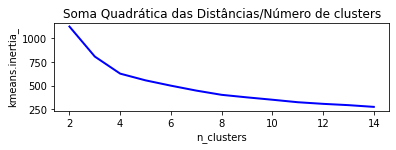

In [19]:
fig = plt.figure()
fig.subplots_adjust(top=0.8)
ax1 = fig.add_subplot(211)
ax1.set_ylabel('kmeans.inertia_')
ax1.set_xlabel('n_clusters')
ax1.set_title('Soma Quadrática das Distâncias/Número de clusters')

line, = ax1.plot(clusters, results, color='blue', lw=2)

plt.show()

## Função da soma quadrática das distâncias
A função abaixo calcula o ponto de maior distância (cotovelo) em relação à reta que vai do ponto mais à esquerda ao ponto que vai mais a direita.

In [37]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

## Melhor número de clusters
Cálculo utilizando a soma quadrática das distâncias.

In [38]:
print (optimal_number_of_clusters(results))

7
